Importamos librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.colors as mcolors
import os

Establecemos GPU

In [2]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

Importamos data set

In [5]:
REPO_URL = "https://github.com/Lumasciangelo/AA2.git"
SUBDIR = "Ejercicio_1"
REPO_NAME = "AA2"

if SUBDIR not in os.getcwd():
    if not os.path.exists(REPO_NAME):
        # Inicializar el repositorio vacío
        !git clone --depth 1 --filter=blob:none --sparse {REPO_URL}
        os.chdir(REPO_NAME)
        # Activar el modo sparse-checkout y obtener solo el subdirectorio
        !git sparse-checkout init --cone
        !git sparse-checkout set {SUBDIR}
    os.chdir(SUBDIR)

Cloning into 'AA2'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 25 (delta 0), reused 25 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 579.46 KiB | 2.42 MiB/s, done.
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 1 (delta 0), reused 1 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (1/1), 47.09 KiB | 3.62 MiB/s, done.


Cargamos y visualizamos los datos

In [6]:
data = pd.read_csv('Student_Performance.csv')
print(data.head())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


vemos si hay nulos y de que tipo es cada variable

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


Pasamos la variable actividades extracurriculares a dummy: "Yes" : 1, "No" : 0

In [ ]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

Vemos algunas estadísticas de nuestras variables

In [ ]:
data.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


Estandarizamos las variables

In [ ]:
# Utilizamos el método Z score con la librería StandardScaler porque en su fórmula tiene en cuenta la varianza,
# ya que notamos que algunas de nuestras variables tienen una varianza muy alta
df_sub = data
df_std = (df_sub-df_sub.mean())/df_sub.std()

Vemos la distribución de las variables

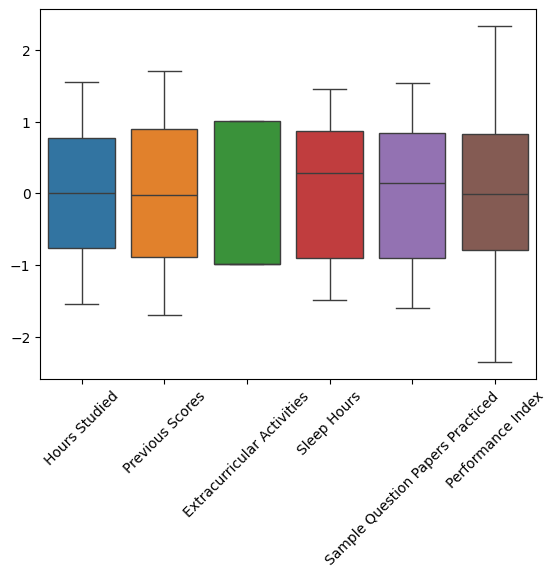

In [ ]:
#Distribución de variables
sns.boxplot(data = df_std)
plt.xticks(rotation= 45)
plt.show()

Definimos nuestro modelo

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(5,)),
    #tf.keras.layers.Dense(units=10, activation='sigmoid'),
    tf.keras.layers.Dense(units=1, activation='linear')
])

Separamos en train y test y entrenamos el modelo

In [ ]:
x = df_std.drop(['Performance Index'], axis = 1)
y = df_std['Performance Index']
#print(x.shape)
#print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(optimizer=optimizer, loss='mae')
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2172 - val_loss: 0.0971
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0950 - val_loss: 0.0928
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0948 - val_loss: 0.0967
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0978 - val_loss: 0.0895
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0913 - val_loss: 0.0958
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0954 - val_loss: 0.0991
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0934 - val_loss: 0.0936
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0963 - val_loss: 0.0901
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0940 - val_loss: 0.0926
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0935 - val_loss: 0.0889
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0934 - val_loss: 0.0961
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Probamos varios modelos diferentes:

*   agregando una capa oculta con 20 neuronas y activacion relu que nos dio un mae en train de 0.0976 mientras que en test nos dio un mae de 1.1119, es decir que el modelo está overfiteando
*   agregando una capa oculta con 10 neuronas y activacion sigmoide que nos dio un mae en train de 0.0923 mientras que en test nos dio un mae de 0.1031, es decir que el modelo sigue overfiteando pero un poco menos
*   Por último probamos sacando las capas ocultas y obtuvimos un mae en train de 0.0951 mientras que en test nos dio un mae de 0.0966, por lo tanto nos vamos a quedar con este modelo




También miramos la correlación lineal que hay entre las variables

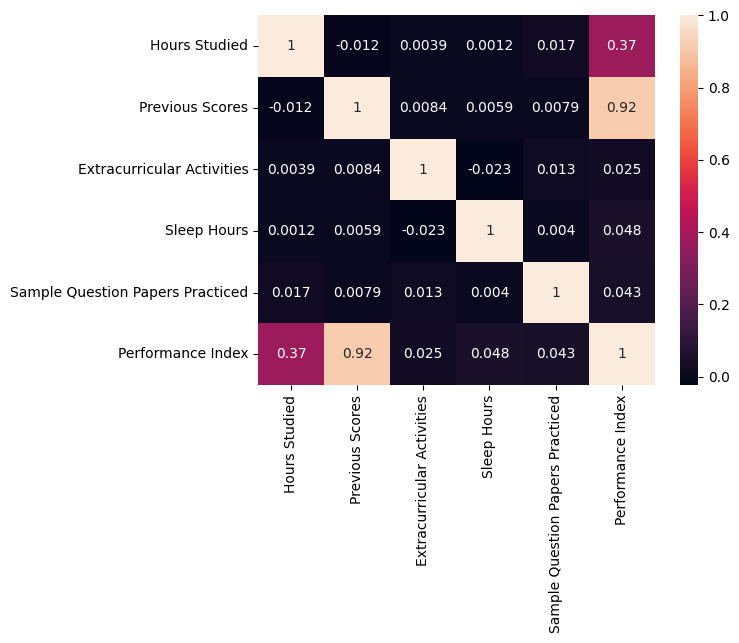

In [ ]:
matriz = data.corr()
sns.heatmap(matriz, annot=True)
plt.show()

Observamos que nuestra variable respuesta (Performance Index) tiene muy poca correlación con las variables "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced", por ende vamos a probar sacandolas de nuestro modelo para ver que ocurre.

Definimos un nuevo modelo

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    #tf.keras.layers.Dense(units=10, activation='sigmoid'),
    tf.keras.layers.Dense(units=1, activation='linear')
])

Separamos en train y test y entrenamos el modelo

In [ ]:
x = df_std[['Hours Studied','Previous Scores']]
y = df_std['Performance Index']
#print(x.shape)
#print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
model2.compile(optimizer=optimizer, loss='mae')
model2.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0990 - val_loss: 0.1004
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1015 - val_loss: 0.0998
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0975 - val_loss: 0.1046
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1001 - val_loss: 0.0961
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0998 - val_loss: 0.0983
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0998 - val_loss: 0.1067
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0991 - val_loss: 0.0957
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1018 - val_loss: 0.1055
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0997 - val_loss: 0.1043
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0996 - val_loss: 0.1018
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1014 - val_loss: 0.0974
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

En este modelo nuevo obtuvimos un mae en train de 0.1016 y en test de 0.1005, por ende nos quedaríamos con este nuevo modelo que tiene solo como variables explicativas "Hours Studied" y "Previous Scores", ya que no difiere significativamente del modelo anterior y tiene menos parámetros.

In [ ]:
X1 = df_std['Hours Studied'].to_numpy()
X2 = df_std['Previous Scores'].to_numpy()
Y = df_std['Performance Index'].to_numpy()

Definimos una función para plotear la frontera de decisión sobre los datos.

In [ ]:
def plot_results(X1, X2, Y, model):
    plt.xlabel('Hours Studied')
    plt.ylabel('Previous Scores')
    x1 = np.linspace(-2, 2, 200)
    x2 = np.linspace(-2, 2, 200)
    x1, x2 = np.meshgrid(x1, x2, indexing='ij')
    x = np.array([x1.ravel(), x2.ravel()]).T
    y = model.predict(x).reshape(x1.shape)
    norm = mcolors.Normalize(vmin=min(Y), vmax=max(Y))
    plt.imshow(y, extent=(-2, 2, -2, 2), origin='lower', cmap='viridis', alpha=1, norm = norm)
    plt.scatter(X1, X2, c=Y, cmap='viridis', edgecolor='k', s=50, norm = norm)
    plt.colorbar()
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.show()

Ploteamos los resultados

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


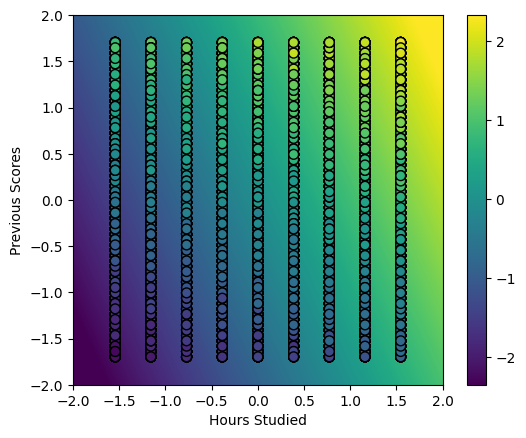

In [ ]:
plot_results(X1, X2, Y, model2)